In [1]:
# prompt: upload image

from google.colab import files
uploaded = files.upload()



Saving Lena_Image.png to Lena_Image.png


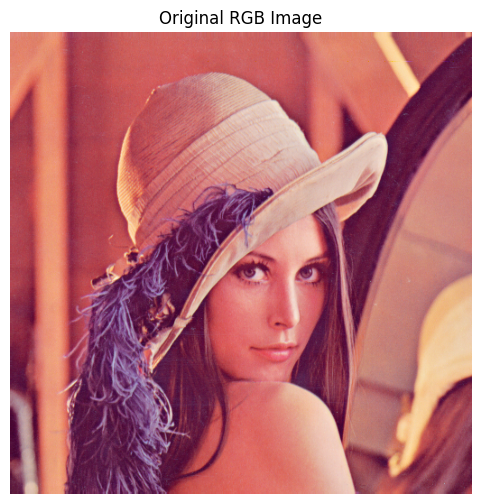

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set the image path (replace this with your uploaded image path)
image_path = "/content/Lena_Image.png"

# 1️⃣ Read the image (BGR to RGB)
image_bgr = cv2.imread(image_path)  # Read image in BGR format
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)  # Convert to RGB

# 2️⃣ Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()


In [12]:
# 3️⃣ Extract image size
height, width, channels = image_rgb.shape
print(f"Image Size: {width}x{height}, Channels: {channels}")

# 4️⃣ Calculate total pixels
total_pixels = width * height
print(f"Total Pixels: {total_pixels}")


Image Size: 512x512, Channels: 3
Total Pixels: 262144


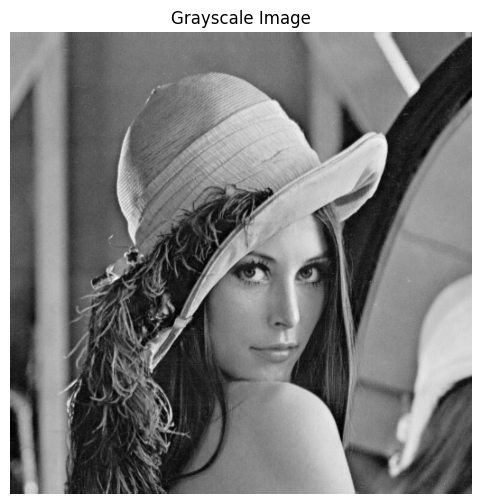

In [13]:
# 5️⃣ Convert to Grayscale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
cv2.imwrite("/content/grayscale.jpg", image_gray)  # Save grayscale image

# Display Grayscale Image
plt.figure(figsize=(6, 6))
plt.imshow(image_gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


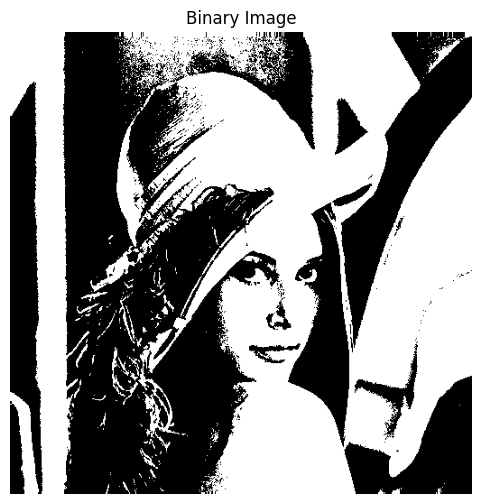

Black Pixels Count: 128178


In [14]:
# 6️⃣ Convert to Binary using Thresholding
threshold = 127
_, binary_image = cv2.threshold(image_gray, threshold, 255, cv2.THRESH_BINARY)
cv2.imwrite("/content/binary.jpg", binary_image)  # Save Binary Image

# Display Binary Image
plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image")
plt.axis("off")
plt.show()

# Count black pixels (0 values)
black_pixel_count = np.sum(binary_image == 0)
print(f"Black Pixels Count: {black_pixel_count}")


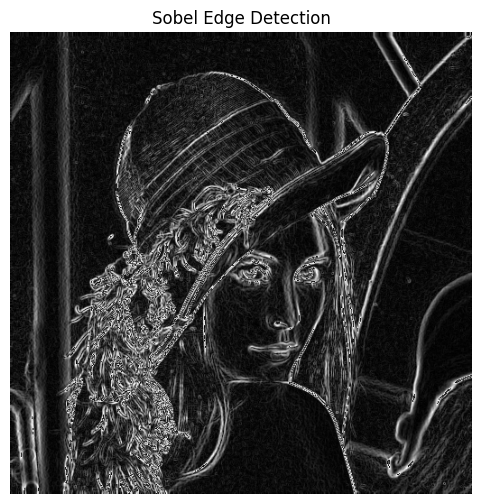

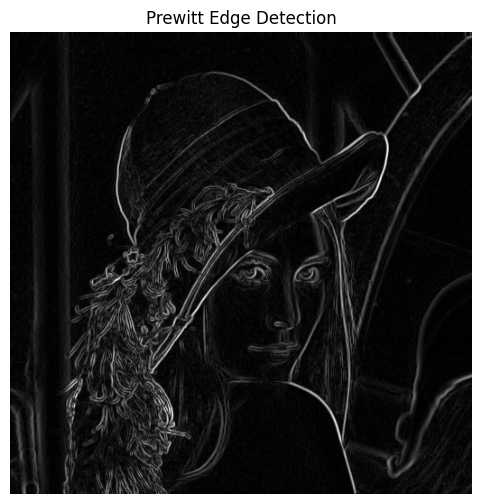

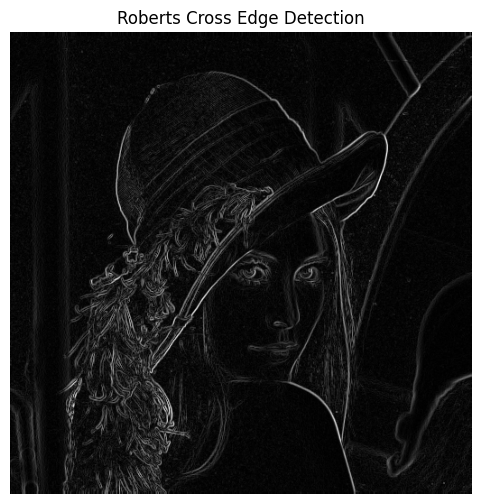

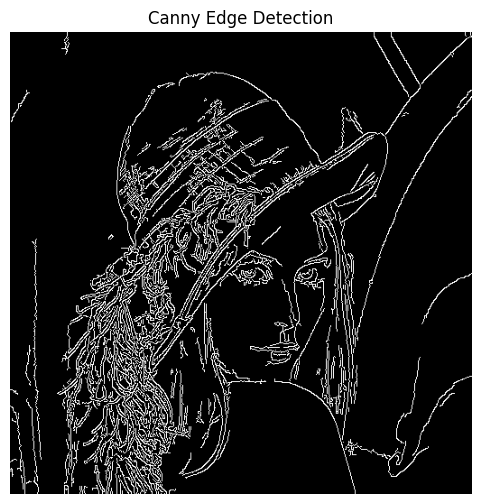

In [15]:
from skimage.filters import prewitt, roberts

# 1️⃣ Sobel Operator
sobelx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobelx, sobely)
sobel_edges = np.uint8(sobel_edges)

plt.figure(figsize=(6, 6))
plt.imshow(sobel_edges, cmap="gray")
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()

# 2️⃣ Prewitt Operator
prewitt_edges = prewitt(image_gray)

plt.figure(figsize=(6, 6))
plt.imshow(prewitt_edges, cmap="gray")
plt.title("Prewitt Edge Detection")
plt.axis("off")
plt.show()

# 3️⃣ Roberts Cross Operator
roberts_edges = roberts(image_gray)

plt.figure(figsize=(6, 6))
plt.imshow(roberts_edges, cmap="gray")
plt.title("Roberts Cross Edge Detection")
plt.axis("off")
plt.show()

# 4️⃣ Canny Edge Detector
canny_edges = cv2.Canny(image_gray, 50, 150)

plt.figure(figsize=(6, 6))
plt.imshow(canny_edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


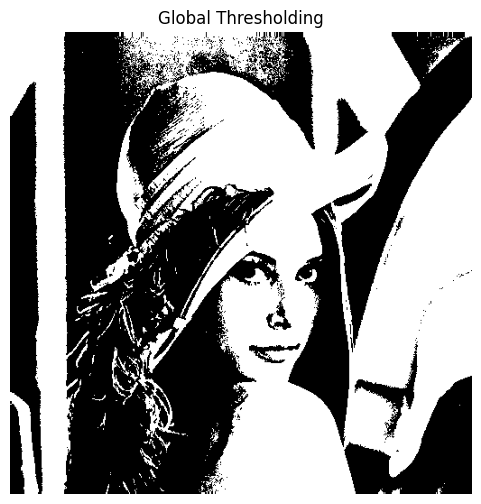

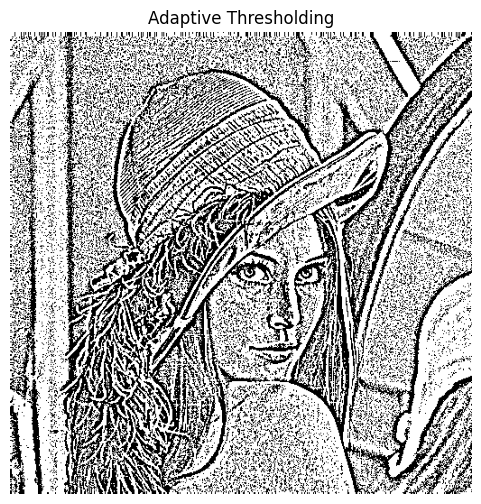

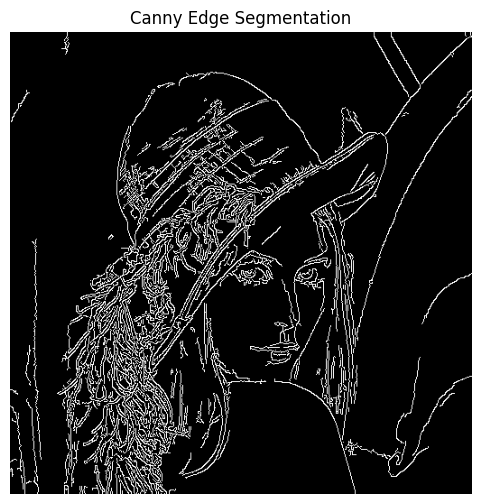

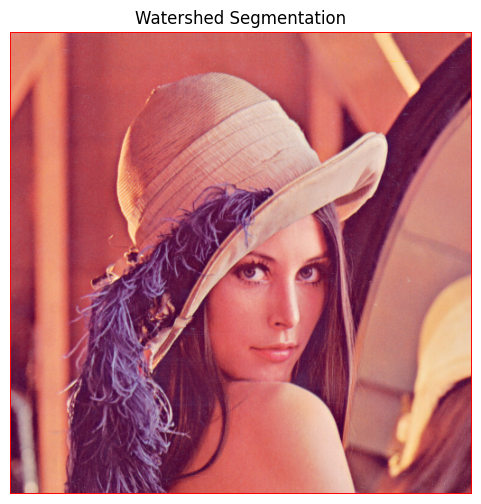

In [16]:
from skimage.segmentation import watershed
from scipy import ndimage

# 1️⃣ Global Thresholding
_, global_thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6, 6))
plt.imshow(global_thresh, cmap="gray")
plt.title("Global Thresholding")
plt.axis("off")
plt.show()

# 2️⃣ Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

plt.figure(figsize=(6, 6))
plt.imshow(adaptive_thresh, cmap="gray")
plt.title("Adaptive Thresholding")
plt.axis("off")
plt.show()

# 3️⃣ Edge Detection for Segmentation (Canny)
plt.figure(figsize=(6, 6))
plt.imshow(canny_edges, cmap="gray")
plt.title("Canny Edge Segmentation")
plt.axis("off")
plt.show()

# 4️⃣ Region-Based Segmentation (Watershed Algorithm)
ret, markers = cv2.connectedComponents(binary_image)
markers = markers + 1
unknown = cv2.subtract(binary_image, binary_image)
markers[unknown == 255] = 0

# Apply Watershed
image_rgb_copy = image_rgb.copy()
markers = cv2.watershed(image_rgb_copy, markers)
image_rgb_copy[markers == -1] = [255, 0, 0]  # Mark boundaries

plt.figure(figsize=(6, 6))
plt.imshow(image_rgb_copy)
plt.title("Watershed Segmentation")
plt.axis("off")
plt.show()
